In [1]:
import neurokit2 as nk
import matplotlib.pyplot as plt

%matplotlib notebook

ecg = nk.ecg_simulate(duration=240, noise=0.1, heart_rate=70, random_state=41)

# Usage in pipeline

<IPython.core.display.Javascript object>


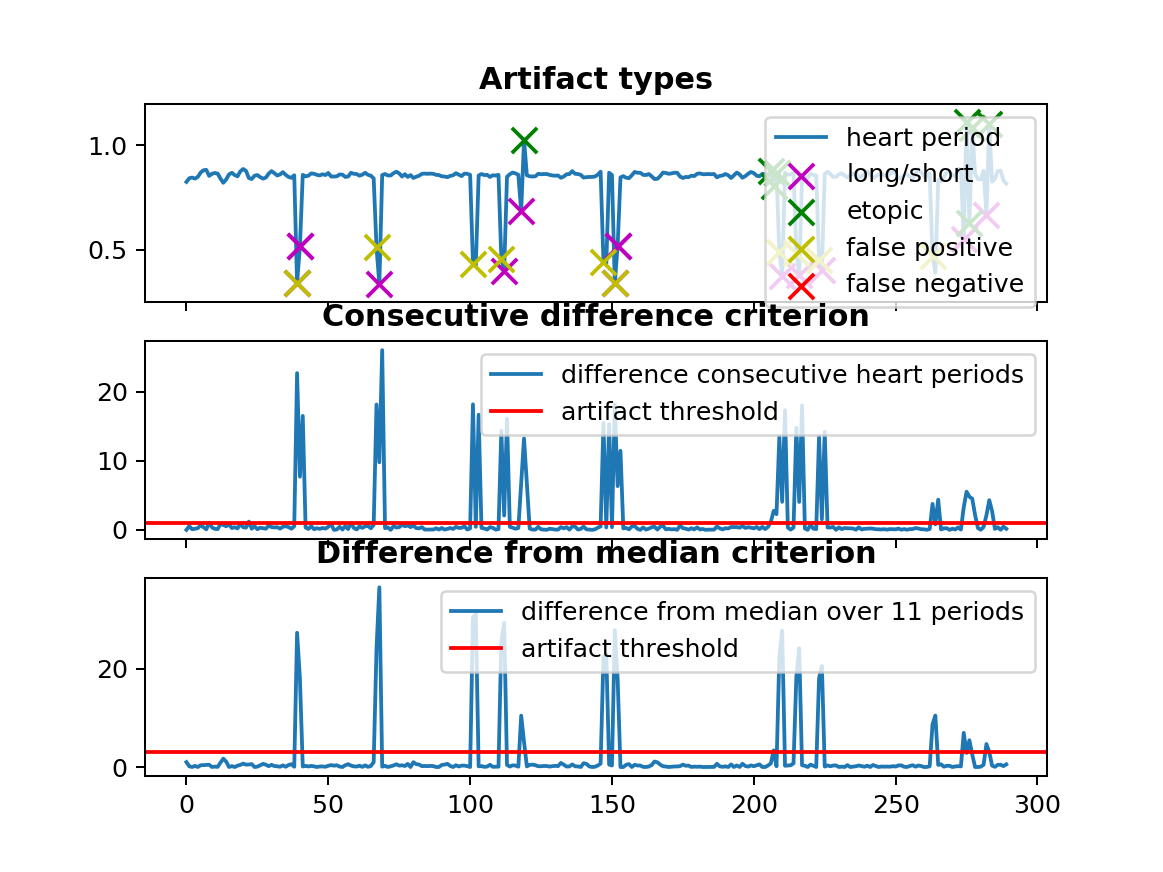

<IPython.core.display.Javascript object>


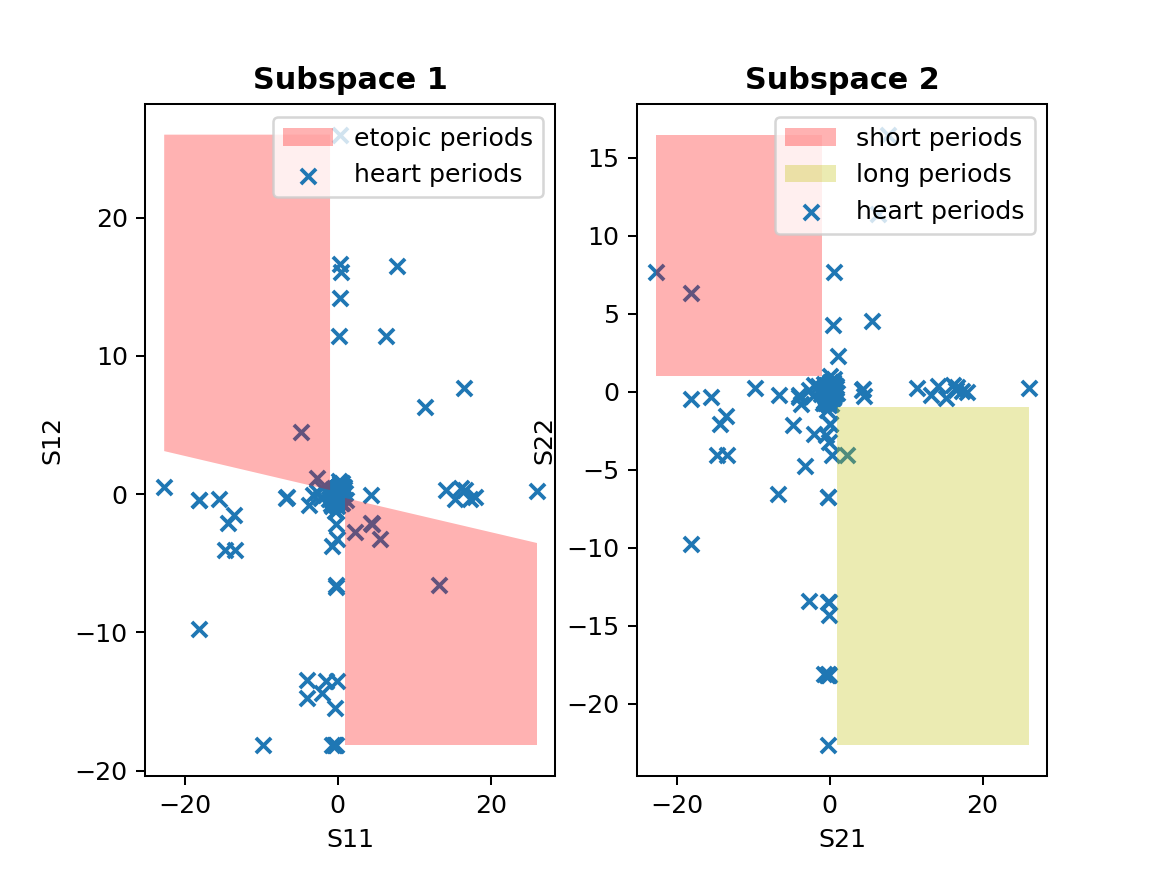

<IPython.core.display.Javascript object>


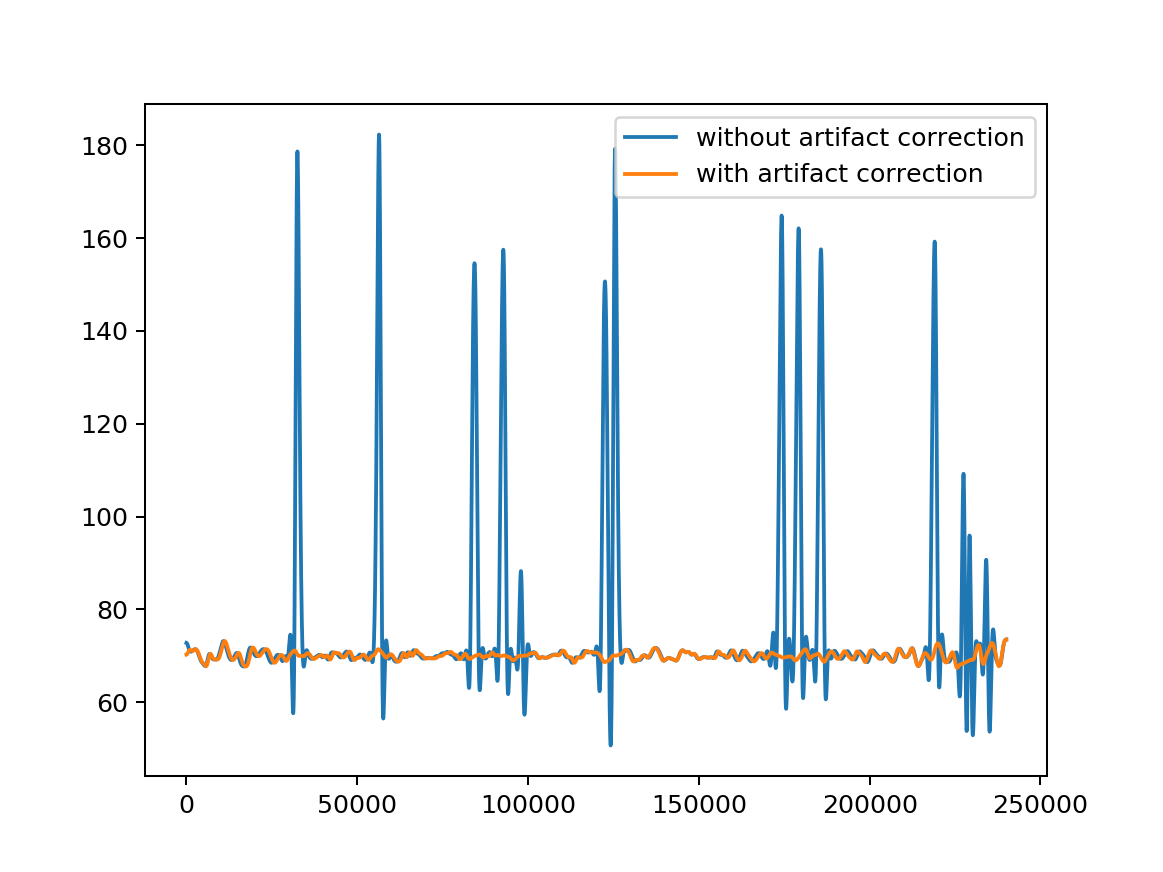

In [2]:
# Subsequently call low-level methods.
rpeaks = nk.ecg_findpeaks(ecg)
artifacts = nk.ecg_fixpeaks(rpeaks, show=True)
rate_corrected = nk.ecg_rate(rpeaks, artifacts=artifacts, desired_length=len(ecg))
# If artifact correction is not desired, the artifact argument is simply left out
# (default is None)
rate_uncorrected = nk.ecg_rate(rpeaks, desired_length=len(ecg))

fig, ax = plt.subplots()
ax.plot(rate_uncorrected, label="heart rate without artifact correction")
ax.plot(rate_corrected, label="heart rate with artifact correction")
ax.legend(loc="upper right")

# Usage in ecg_peak wrapper

In [3]:
# If return of artifacts is not desired, the artifact argument is simply not set to True
# (default is False).
peaks_signal, peaks, artifacts = nk.ecg_peaks(ecg, autocorrect_peaks=True)
for key, val in artifacts.items():
    print(f"{key} : {val}")

etopic : [119, 206, 207, 208, 275, 276, 277, 283]
missed : []
extra : [39, 67, 101, 111, 147, 151, 209, 215, 223, 263]
longshort : [39, 40, 40, 68, 112, 118, 151, 152, 152, 210, 216, 224, 274, 282]


# Usage in convenience method ecg_process

In [7]:
# Note that the artifact detection and correction is non-optionally applied by default.
# I feel like this cannot hurt since the call to ecg_fixpeaks returns quickly and artifact
# correction is nice-to-have anyway.
signals, info = nk.ecg_process(ecg)

<IPython.core.display.Javascript object>


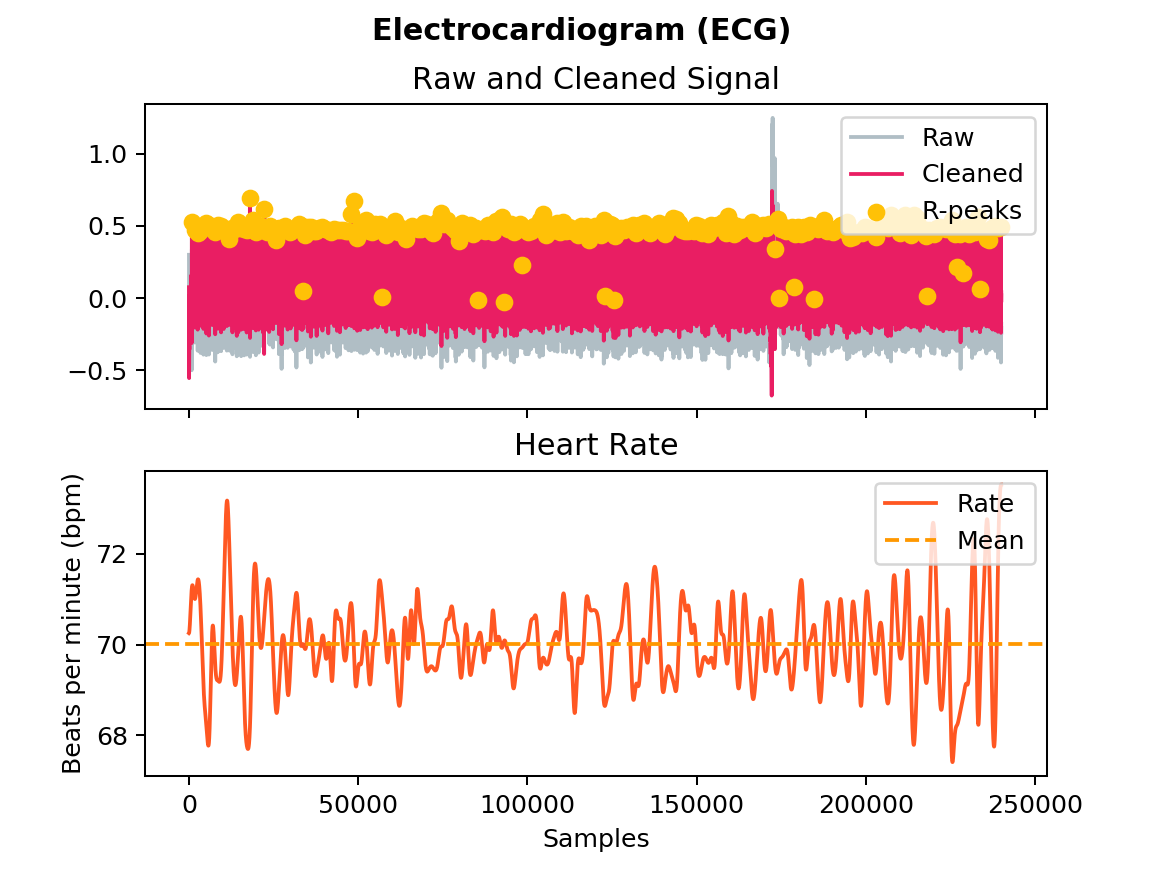

In [6]:
fig = nk.ecg_plot(signals)